# Predicting words

In [1]:
#import libraries
import numpy as np
from PIL import Image
from numpy import loadtxt
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# load model
model = load_model('model.h5')

In [3]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

### Lets start!

#### Images must:
    - greyscale
    - 1/255
    - 28,28
    - array
    
(white is yellow = 0 , black = 255)

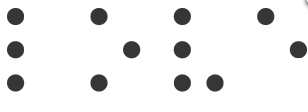

In [17]:
image_original = Image.open("../dataset/test/words/love.png").convert("L") #Greyscale
image_original

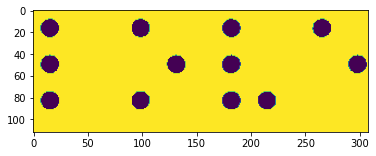

In [18]:
arr = np.array(image_original)
arr =  np.where(arr<100,0,255) # In order to set the array values from 0 to 1 (black or white) 
plt.imshow(arr)

In [19]:
#This funtions allows us to see the lines where the dots for the characters should be
def liner(arr):
    arr1= arr.copy()
    values = arr1.prod(axis=0)
    values = np.where(values!=0,0,255)
    for i in range(arr1.shape[1]):
        arr1[:,i] = values[i]
    return arr1

In [20]:
arr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

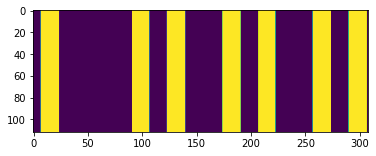

In [23]:
#Visual representation with a vertical line of where the dots that form the character are located
plt.imshow(liner(arr))

In [24]:
values = arr.prod(axis=0)
values = np.where(values!=0,255,0)

In [25]:
start = []
end = []
thick_col = []
previous = values[0]

for i,val in enumerate(values):
    if val == 0 and previous!=0: # This indicates when a vert line starts
        start.append(i)
    elif val !=0 and previous == 0: #This indicated when a vert line finnishes
        end.append(i)
        thick_col.append(i-start[-1]) #By substracting these values we get the thickness of the column
    previous = val
    

In [26]:
print('Starting loc of v.lines:', start)

Starting loc of v.lines: [7, 91, 123, 174, 207, 257, 290]


In [27]:
print('Ending loc of v.lines:', end)

Ending loc of v.lines: [24, 107, 140, 191, 223, 274, 307]


In [28]:
dist = [s-e for e,s in zip(start,start[1:])] #Distance between starting lines
dist

[84, 32, 51, 33, 50, 33]

In [29]:
dist_mean = sum(dist)/len(dist) #Mean distance between lines
dist_mean

47.166666666666664

In [30]:
thick_col #Has been found whith the function used above

[17, 16, 17, 17, 16, 17, 17]

In [31]:
thick_col = sum(thick_col)/len(thick_col) #Thick col mean
thick_col

16.714285714285715

In [42]:
letter_start = []
letter_end = []

# If the dist between the 1st and 2nd col is less that the mean dist means its the end of a letter (2nd col)
# else it means the letter has ended with just one col

for left, right in zip(start,start[1:]):
    if right - left < dist_mean:
        letter_start.append(left)
        letter_end.append(right) #segunda col mismo caracter

for i in start:
    if not((i in letter_start) or (i in letter_end)):
        letter_start.append(i)
        
letter_start = sorted(letter_start)
        

In [43]:
letter_start #col left the cada caracter

[7, 91, 174, 257]

In [44]:
arr.shape

(112, 308)

In [45]:
sep_letters = []

arr = np.array(image_original)#le paso la imagen original porque mi modelo NO esta entrenado con 0 o 1, sino gray
for st in letter_start:
    left = int(st-thick_col/2)
    left = left if left >= 0 else 0
    right = int(st+dist_mean+thick_col)
    right = right if right <= arr.shape[1] else arr.shape[1]
    sep_letters.append(arr[:,left:right])

In [46]:
prep_letters = []

for letter in sep_letters:
    img = Image.fromarray(letter.astype(np.uint8))
    img = img.resize((28,28))
    prep_letters.append(np.array(img).reshape(1,28,28,1)/255)

In [47]:
prep_letters[0].shape

(1, 28, 28, 1)

In [48]:
prep_letters = np.concatenate(prep_letters, axis = 0)

In [49]:
prep_letters.shape

(4, 28, 28, 1)

#### Predict the word

In [50]:
y_pred_word = np.argmax(model.predict(prep_letters),axis=1)
y_pred_word = [class_names[i] for i in y_pred_word]
prediction = ''.join(y_pred_word)
print(prediction)

LOVE
